## Homework #17 - Model Interpretation

### Overview:
In the last topic, you learned how to interpret a model. In this homework,
we invite you to apply all the knowledge to interpret the models’ results
on the Data Sets.

### Task:
For this chapter, you will have to do the following:
* Import both Data Sets.
* Train a linear regression model on the regression Data Set and make
a bar plot using the weights of the linear model. Interpret the plot.
* Generate the classification Data. Set the image showing the decision
tree.
* For both Data sets, after it was cleaned, split them into the train
and test subsets.
* On the train subsets of the regression Data Set to trail the following algorithms: `Linear Regression` and `KNN Regression` (bonus: try
`RandomForestRegression` and `DecissionTreeRegression`).
* On the train subsets of the regression Data Set to trail the following
algorithms: Logistic Regression, Gaussian Naive Bayes, and KNN Classifier (bonus: try `RandomForestClassification`, `DecissionTreeClassification`, `Bernoulli Naive Bayes`, and `Multinomial Naive Bayes`).
* For each regression model, get the MSE, MAE, and RMSE on the
test subset.
* For each classification model, get the Accuracy, Precision, Recall,
and F1-Score.
* For each regression model, build the following table.

<div align="center">

| Estimator | MSE | MAE | RMSE |
|:---------:|:---:|:---:|:----:|
|   est 1   |     |     |      |
|   est 2   |     |     |      |
|    ...    |     |     |      |
|   est n   |     |     |      |

</div>

* For each classification model, build the following table.

<div align='center'>

| Estimator | Accuracy | Precision | Recall | F1-Score |
|:---------:|:--------:|:---------:|:------:|----------|
|   est 1   |          |           |        |          |
|   est 2   |          |           |        |          |
|    ...    |          |           |        |          |
|   est n   |          |           |        |          |

</div>

* Analyze the tables you got, make some conclusions, and choose the
best regression and classification, models.
* Pick the best classification model and interpret it using shap: Create
the following plots:
  * SHAP barplot.
  * SHAP waterfall plot.
  * SHAP beeswarm plot.
  * SHAP force plot.
* Make some conclusions on each plot.
* Pick the best regression model and interpret it using LIME. Find
the samples with the highest difference between the target and predicted
values. Interpret them with LIME and say what went wrong.
* Make some conclusions on each plot.

In [2]:
# Import Data Structures
import numpy as np
import pandas as pd

# Import Base Classes for Type Annotation
from sklearn.base import TransformerMixin, BaseEstimator
from typing import List, Tuple

# Import Structure Manipulation Methods
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Import Visualization Libs
import matplotlib.pyplot as plt
import seaborn as sns
from dtreeviz import model

# Import ML Models
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier

# Import Interpretation Metrics
from sklearn.metrics import (mean_squared_error, mean_absolute_error, root_mean_squared_error, accuracy_score, precision_score, recall_score, f1_score, classification_report,
                             confusion_matrix, ConfusionMatrixDisplay)
from lime.lime_tabular import LimeTabularExplainer
import shap

# Import Time
import time
from tqdm import tqdm

# Import Datasets

### Electric Motor Temperature Prediction Dataset

In [3]:
electric_motor_temps_df = pd.read_csv(filepath_or_buffer="dataset/measures_v2.csv")

### Heart Failure Prediction Dataset

In [4]:
heart_failure_df = pd.read_csv(filepath_or_buffer="dataset/heart.csv")

# Regression Problem - Linear Regressor Weights Interpretation

### Electric Motor Temperature Dataset Analysis

In [5]:
electric_motor_temps_df = electric_motor_temps_df.sample(n=100000, random_state=42)

In [6]:
electric_motor_temps_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100000 entries, 294684 to 543932
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   u_q             100000 non-null  float64
 1   coolant         100000 non-null  float64
 2   stator_winding  100000 non-null  float64
 3   u_d             100000 non-null  float64
 4   stator_tooth    100000 non-null  float64
 5   motor_speed     100000 non-null  float64
 6   i_d             100000 non-null  float64
 7   i_q             100000 non-null  float64
 8   pm              100000 non-null  float64
 9   stator_yoke     100000 non-null  float64
 10  ambient         100000 non-null  float64
 11  torque          100000 non-null  float64
 12  profile_id      100000 non-null  int64  
dtypes: float64(12), int64(1)
memory usage: 10.7 MB


In [7]:
print(electric_motor_temps_df.isnull().sum())

u_q               0
coolant           0
stator_winding    0
u_d               0
stator_tooth      0
motor_speed       0
i_d               0
i_q               0
pm                0
stator_yoke       0
ambient           0
torque            0
profile_id        0
dtype: int64


In [8]:
electric_motor_temps_df.describe()

u_q        coolant  stator_winding            u_d  \
count  100000.000000  100000.000000   100000.000000  100000.000000   
mean       54.319072      36.258608       66.358050     -24.889552   
std        44.192562      21.745736       28.622117      63.146397   
min       -25.162914      11.996709       18.647297    -131.414703   
25%        12.071366      18.699257       42.803634     -78.156737   
50%        48.940783      26.923347       65.106590      -7.284895   
75%        90.119486      49.859859       88.297508       1.475165   
max       132.832276      93.741243      141.187622     131.390152   

        stator_tooth    motor_speed            i_d            i_q  \
count  100000.000000  100000.000000  100000.000000  100000.000000   
mean       56.903292    2197.534116     -68.441017      37.043606   
std        22.928662    1855.826642      64.779708      92.228123   
min        18.198172    -271.374288    -277.764709    -293.409766   
25%        38.465833     300.012825    -114.674298       1.095845   
50%        55.996900    1999.976440     -50.733913      15.773895   
75%        75.591499    3749.964600      -2.979643     100.429239   
max       111.822052    5999.961914       0.051897     301.707458   

                  pm    stator_yoke        ambient         torque  \
count  100000.000000  100000.000000  100000.000000  100000.000000   
mean       58.561660      48.214017      24.572669      30.772481   
std        18.982161      19.963593       1.927324      77.158930   
min        20.894161      18.108742       9.934283    -246.466663   
25%        43.220772      32.024176      23.185947      -0.140867   
50%        60.401683      45.703591      24.802331      10.844868   
75%        72.045241      61.489156      26.221016      91.226636   
max       113.236389     101.035361      30.155279     261.005707   

          profile_id  
count  100000.000000  
mean       40.827940  
std        25.072259  
min         2.000000  
25%        17.000000  
50%        43.000000  
75%        65.000000  
max        81.000000

In [9]:
electric_motor_temps_df.head(n=10)

u_q    coolant  stator_winding         u_d  stator_tooth  \
294684   86.466103  65.036774      104.791176  -98.284904     91.937675   
668769   15.378630  40.755117      113.639708 -130.061039     86.672110   
1326035  68.999737  33.267112       56.794665  110.739814     50.963561   
879218   24.476531  65.758342      103.064760  -12.740853     91.052836   
75406    30.764919  18.708979      100.925667 -127.402679     73.858398   
93605     8.791204  18.060417      101.799393   -9.797626     71.217995   
758918   17.311122  49.915465      126.759719  -31.838442     98.240255   
39413    83.099045  18.986408       49.642330  -85.312683     41.966564   
1087072  43.006528  44.168642       82.819763  121.062608     71.946262   
1060747   0.648810  46.540803       45.986175    2.686103     45.896326   

         motor_speed         i_d         i_q         pm  stator_yoke  \
294684   4999.950684 -132.641800   54.136551  90.431534    78.844124   
668769   4999.958502 -205.998951   76.196675  81.452672    64.649777   
1326035  4576.694931 -147.744392  -82.554835  67.810123    44.780991   
879218    501.136705  -15.493681   70.795574  63.638145    80.267652   
75406    4499.962891 -191.776855   83.747658  73.154007    51.237759   
93605      99.984886 -122.973541  242.423523  34.920715    51.610775   
758918    445.014808 -114.021640  231.615866  74.650510    78.937645   
39413    1999.983765  -43.513123  132.617096  47.301857    33.376575   
1087072  3283.468316 -156.333239 -127.812109  65.738054    60.436605   
1060747    -0.002069   -2.001055    1.096253  59.400782    45.608398   

           ambient         torque  profile_id  
294684   25.714001   4.751368e+01           6  
668769   22.844333   7.500000e+01          41  
1326035  23.684174  -7.706137e+01          71  
879218   24.317449   5.000000e+01          45  
75406    19.926497   8.003619e+01          21  
93605    22.432100   2.068187e+02           2  
758918   26.371587   1.901457e+02          49  
39413    23.399538   1.018176e+02          12  
1087072  25.188276  -1.177234e+02          63  
1060747  26.382181 -3.705492e-320          65

### Dataset Split

In [10]:
X_motor_features: pd.DataFrame = electric_motor_temps_df.drop(columns=['pm'])
y_motor_target: pd.Series = electric_motor_temps_df['pm']

In [11]:
X_motor_train, X_motor_test, y_motor_train, y_motor_test = train_test_split(X_motor_features,
                                                                            y_motor_target,
                                                                            test_size=.2,
                                                                            random_state=42)

In [12]:
X_motor_train

u_q    coolant  stator_winding         u_d  stator_tooth  \
305130    -1.121870  18.285995       20.977854    1.458535     19.850620   
161966    58.225388  19.363754      100.354218 -115.223724     77.624161   
899802    -1.005348  80.404344       73.503727    3.182835     72.109876   
836430    90.922323  29.181908       62.415772   93.143124     53.161434   
911838    35.649665  70.175688      104.750140  122.965468     93.452932   
...             ...        ...             ...         ...           ...   
963520    49.954207  54.694490      102.379023   91.610265     88.030356   
120858    96.665909  18.271891       26.385857   -0.834688     27.205917   
595705    31.016726  18.274433       58.817509  -40.848671     45.296516   
199566   118.416466  19.385160       45.594906   -1.191024     41.531815   
1145823    0.539293  69.316837       68.926942   -0.607639     67.855900   

         motor_speed         i_d         i_q  stator_yoke    ambient  \
305130      0.002923   -2.001632    1.095612    19.848520  25.940660   
161966   5999.945312 -167.917862   52.155487    52.572636  23.293581   
899802      0.008728   -1.999918    1.096682    71.794443  25.663476   
836430   5492.511767 -140.805747  -57.790601    42.787753  25.971944   
911838   2023.011096 -127.099188 -231.253457    82.495325  27.990944   
...              ...         ...         ...          ...        ...   
963520   1689.669078  -68.231885 -185.609215    75.390002  28.012497   
120858   1999.980225   -2.000122    1.096924    24.454254  23.327131   
595705    749.989868  -65.982178  172.998840    35.509293  24.809063   
199566   2499.974365   -2.000051    1.098451    33.841019  25.072845   
1145823     0.007499   -1.999975    1.096346    67.240530  26.384509   

                torque  profile_id  
305130    5.423755e+00           6  
161966    4.900652e+01          19  
899802   -1.818134e-13          69  
836430   -5.432521e+01          70  
911838   -1.956779e+02          61  
...                ...         ...  
963520   -1.473769e+02          56  
120858   -2.879029e-01           4  
595705    1.391373e+02          16  
199566   -8.582639e-01           9  
1145823 -7.863587e-240          66  

[80000 rows x 12 columns]

In [13]:
X_motor_test

u_q    coolant  stator_winding         u_d  stator_tooth  \
490588    24.762499  19.766777      110.360397 -128.394806     80.862335   
548858    23.073801  19.015978       96.463448 -129.242325     69.046616   
226875    49.784672  18.170614       72.134300  -61.649761     59.444069   
1289296   76.982006  91.149759      124.815490 -106.140094    110.616932   
1120289   -0.928938  45.699955       45.729535   -0.679873     44.637684   
...             ...        ...             ...         ...           ...   
1234574   86.399808  56.489077       86.705418  -97.080838     72.203253   
464828     4.726768  18.534573       36.808380   -1.550291     33.118774   
1036954    1.163253  28.246396       28.051539    0.379363     27.692772   
254833     1.079817  18.634089       22.393713    0.131187     21.663681   
1210074  131.485010  91.060373       95.102612   -4.646255     92.308567   

         motor_speed         i_d         i_q  stator_yoke    ambient  \
490588   5499.955078 -196.686127   66.374977    53.914219  19.850622   
548858   3999.956543 -203.911087   99.497070    46.041653  23.996336   
226875   1249.988525  -52.046509  150.341324    45.021465  23.503063   
1289296  3987.705516 -125.074935   76.388099    99.937590  28.153039   
1120289    -0.000389   -1.999932    1.097995    44.599174  25.794023   
...              ...         ...         ...          ...        ...   
1234574  4797.455955 -133.265400   56.110510    61.942987  25.750198   
464828     59.941063   -8.773002   49.413731    28.740610  21.170975   
1036954    -0.004813   -2.000568    1.098263    27.398318  24.127318   
254833      0.002112   -0.001096   -0.000775    19.850620  24.896166   
1210074  3999.963501  -57.701278    1.105071    90.047372  25.187584   

                torque  profile_id  
490588    6.414456e+01          24  
548858    9.600164e+01          15  
226875    1.162494e+02          27  
1289296   6.864517e+01          58  
1120289  3.705492e-320          66  
...                ...         ...  
1234574   5.171085e+01          79  
464828    3.497756e+01          29  
1036954 -3.705492e-320          62  
254833    5.310391e+00          27  
1210074  3.705492e-320          44  

[20000 rows x 12 columns]

### Pipeline Instantiation Method

In [14]:
def create_pipeline(transformers: List[Tuple[str, TransformerMixin]] = None,
                    scaler: TransformerMixin = None,
                    model: BaseEstimator = None) -> Pipeline:
    pipeline = Pipeline(steps=[])

    if transformers is not None and len(transformers) > 0:
        pipeline.steps.extend(transformers)

    if scaler is not None:
        pipeline.steps.append(
            ('scale', scaler)
        )

    if model is not None:
        pipeline.steps.append(
            ('model', model)
        )

    return pipeline

### Dataset Preprocessing

In [15]:
features_to_drop = ['profile_id']

In [16]:
drop_transformer = ColumnTransformer(
    transformers=[
        ("drop", "drop", features_to_drop)
    ],
    remainder='passthrough',
    verbose_feature_names_out=False,
    force_int_remainder_cols=False
).set_output(transform='pandas')

In [17]:
standard_scaler = StandardScaler()
standard_scaler.set_output(transform='pandas')

StandardScaler()

### Model Training

In [18]:
linear_regressor = LinearRegression()

In [19]:
pipeline_motor = create_pipeline(transformers=[('drop_transform', drop_transformer)], scaler=None, model=linear_regressor)

In [20]:
pipeline_motor.fit(X=X_motor_train, y=y_motor_train)

Pipeline(steps=[('drop_transform',
                 ColumnTransformer(force_int_remainder_cols=False,
                                   remainder='passthrough',
                                   transformers=[('drop', 'drop',
                                                  ['profile_id'])],
                                   verbose_feature_names_out=False)),
                ('model', LinearRegression())])

In [21]:
y_motor_hat = pipeline_motor.predict(X=X_motor_test)

In [22]:
motor_column_names = pipeline_motor.named_steps['model'].feature_names_in_
# motor_column_names = pipeline_motor[-1].feature_names_in_
motor_column_names

array(['u_q', 'coolant', 'stator_winding', 'u_d', 'stator_tooth',
       'motor_speed', 'i_d', 'i_q', 'stator_yoke', 'ambient', 'torque'],
      dtype=object)

In [23]:
linear_regression_weights = pipeline_motor.named_steps['model'].coef_
# linear_regression_weights = pipeline_motor[-1].coef_
linear_regression_weights

array([-1.34366980e-01, -1.75096539e-01, -1.59397971e+00, -1.78743563e-02,
        3.96339800e+00,  3.03772743e-03,  4.45119264e-02, -1.58411626e-02,
       -1.58637402e+00,  1.77273081e+00,  1.30480679e-02])

### Weights Interpretation

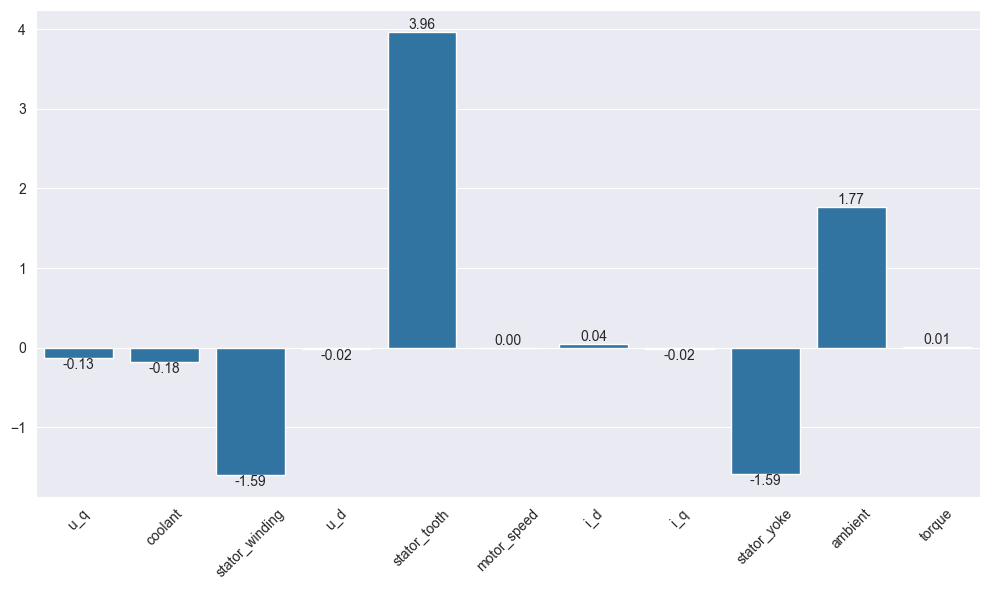

In [24]:
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=motor_column_names, y=linear_regression_weights)
for i, val in enumerate(linear_regression_weights):
    ax.text(i, val, f'{val:.2f}', ha='center', va='bottom' if val >= 0 else 'top')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

As it may be seen, in case of predicting rotor temperature (`pm` column), the most important features are:
1. `stator_tooth` (stator tooth temperature measured with a thermal sensor), with $3.96$ calculated weight,
2. `ambient` (ambient temperature as measured by a thermal sensor located closely to the stator) - $1.77$,
3. `stator_yoke` (stator yoke temperature measured with a thermal sensor) - $-1.56$,
4. `stator_winding` (stator winding temperature measured with a thermal sensor) - $-1.60$,

while the least significant features are:
1. `motor_speed` with calculated weight equal to $0$,
2. `torque` (calculated weight equal to $0.01$),
3. `i_q` - current q-component measurement in dq-coordinates, with calculated weight of $-0.01$,
4. `u_d` - voltage d-component measurement in dq-coordinates, with calculated weight of $-0.02$,
5. `profile_id` - ID for each record, with calculated weight of $0.03$.

# Classification Problem - Decision Tree Image Interpretation

### Heart Failure Dataset Analysis

In [25]:
heart_failure_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [26]:
print(heart_failure_df.isnull().sum())

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64


In [27]:
for column in heart_failure_df.columns:
    if heart_failure_df[column].dtype == 'object':
        print(f'{column}: {heart_failure_df[column].unique()}')

Sex: ['M' 'F']
ChestPainType: ['ATA' 'NAP' 'ASY' 'TA']
RestingECG: ['Normal' 'ST' 'LVH']
ExerciseAngina: ['N' 'Y']
ST_Slope: ['Up' 'Flat' 'Down']


In [28]:
heart_failure_df.describe()

Age   RestingBP  Cholesterol   FastingBS       MaxHR  \
count  918.000000  918.000000   918.000000  918.000000  918.000000   
mean    53.510893  132.396514   198.799564    0.233115  136.809368   
std      9.432617   18.514154   109.384145    0.423046   25.460334   
min     28.000000    0.000000     0.000000    0.000000   60.000000   
25%     47.000000  120.000000   173.250000    0.000000  120.000000   
50%     54.000000  130.000000   223.000000    0.000000  138.000000   
75%     60.000000  140.000000   267.000000    0.000000  156.000000   
max     77.000000  200.000000   603.000000    1.000000  202.000000   

          Oldpeak  HeartDisease  
count  918.000000    918.000000  
mean     0.887364      0.553377  
std      1.066570      0.497414  
min     -2.600000      0.000000  
25%      0.000000      0.000000  
50%      0.600000      1.000000  
75%      1.500000      1.000000  
max      6.200000      1.000000

In [29]:
heart_failure_df.head(n=10)

Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   
5   39   M           NAP        120          339          0     Normal    170   
6   45   F           ATA        130          237          0     Normal    170   
7   54   M           ATA        110          208          0     Normal    142   
8   37   M           ASY        140          207          0     Normal    130   
9   48   F           ATA        120          284          0     Normal    120   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N      0.0       Up             0  
1              N      1.0     Flat             1  
2              N      0.0       Up             0  
3              Y      1.5     Flat             1  
4              N      0.0       Up             0  
5              N      0.0       Up             0  
6              N      0.0       Up             0  
7              N      0.0       Up             0  
8              Y      1.5     Flat             1  
9              N      0.0       Up             0

In [30]:
heart_failure_df['HeartDisease'].unique()

array([0, 1])

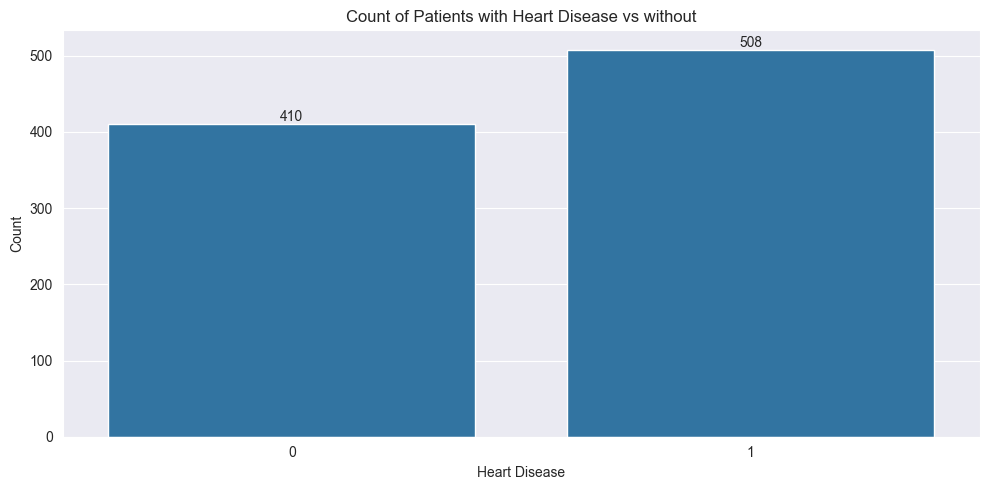

In [31]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.countplot(x=heart_failure_df['HeartDisease'], ax=ax)

ax.bar_label(ax.containers[0])
ax.set_title('Count of Patients with Heart Disease vs without')
ax.set_xlabel('Heart Disease')
ax.set_ylabel('Count')

plt.tight_layout()
plt.show()

### Dataset Split

In [32]:
X_heart_features: pd.DataFrame = heart_failure_df.drop(columns=['HeartDisease'])

In [33]:
y_heart_target: pd.Series = heart_failure_df['HeartDisease']

In [34]:
X_heart_train, X_heart_test, y_heart_train, y_heart_test = train_test_split(X_heart_features,
                                                                            y_heart_target,
                                                                            test_size=.2,
                                                                            random_state=42)

In [35]:
X_heart_train

Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
795   42   M           NAP        120          240          1     Normal   
25    36   M           NAP        130          209          0     Normal   
84    56   M           ASY        150          213          1     Normal   
10    37   F           NAP        130          211          0     Normal   
344   51   M           ASY        120            0          1     Normal   
..   ...  ..           ...        ...          ...        ...        ...   
106   48   F           ASY        120          254          0         ST   
270   45   M           ASY        120          225          0     Normal   
860   60   M           ASY        130          253          0     Normal   
435   60   M           ASY        152            0          0         ST   
102   40   F           ASY        150          392          0     Normal   

     MaxHR ExerciseAngina  Oldpeak ST_Slope  
795    194              N      0.8     Down  
25     178              N      0.0       Up  
84     125              Y      1.0     Flat  
10     142              N      0.0       Up  
344    104              N      0.0     Flat  
..     ...            ...      ...      ...  
106    110              N      0.0       Up  
270    140              N      0.0       Up  
860    144              Y      1.4       Up  
435    118              Y      0.0       Up  
102    130              N      2.0     Flat  

[734 rows x 11 columns]

In [36]:
X_heart_test

Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
668   63   F           ATA        140          195          0     Normal   
30    53   M           NAP        145          518          0     Normal   
377   65   M           ASY        160            0          1         ST   
535   56   M           ASY        130            0          0        LVH   
807   54   M           ATA        108          309          0     Normal   
..   ...  ..           ...        ...          ...        ...        ...   
211   50   F           NAP        140          288          0     Normal   
745   63   F           ASY        108          269          0     Normal   
584   64   M           ASY        141          244          1         ST   
878   49   M           ATA        130          266          0     Normal   
451   64   M           ASY        144            0          0         ST   

     MaxHR ExerciseAngina  Oldpeak ST_Slope  
668    179              N      0.0       Up  
30     130              N      0.0     Flat  
377    122              N      1.2     Flat  
535    122              Y      1.0     Flat  
807    156              N      0.0       Up  
..     ...            ...      ...      ...  
211    140              Y      0.0     Flat  
745    169              Y      1.8     Flat  
584    116              Y      1.5     Flat  
878    171              N      0.6       Up  
451    122              Y      1.0     Flat  

[184 rows x 11 columns]

### Dataset Preprocessing

In [37]:
binary_columns = [col for col in heart_failure_df.columns if heart_failure_df[col].dtype == 'object' and len(heart_failure_df[col].unique()) == 2]
binary_columns

['Sex', 'ExerciseAngina']

In [38]:
multilabel_columns = [col for col in heart_failure_df.columns if heart_failure_df[col].dtype == 'object' and len(heart_failure_df[col].unique()) > 2]
multilabel_columns

['ChestPainType', 'RestingECG', 'ST_Slope']

In [39]:
encoder_transformer = ColumnTransformer(
    transformers=[
        ("encode_binary", OneHotEncoder(drop='first', sparse_output=False), binary_columns),
        ("encode_multiclass", OneHotEncoder(sparse_output=False), multilabel_columns) # TODO: Consider Another Way
    ],
    remainder='passthrough',
    verbose_feature_names_out=False,
    force_int_remainder_cols=False
).set_output(transform='pandas')

### Model Training

In [40]:
decision_tree_classifier = DecisionTreeClassifier()

In [41]:
pipeline_heart = create_pipeline(transformers=[('encode', encoder_transformer)], model=decision_tree_classifier)

In [42]:
pipeline_heart.fit(X=X_heart_train, y=y_heart_train)

Pipeline(steps=[('encode',
                 ColumnTransformer(force_int_remainder_cols=False,
                                   remainder='passthrough',
                                   transformers=[('encode_binary',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  ['Sex', 'ExerciseAngina']),
                                                 ('encode_multiclass',
                                                  OneHotEncoder(sparse_output=False),
                                                  ['ChestPainType',
                                                   'RestingECG', 'ST_Slope'])],
                                   verbose_feature_names_out=False)),
                ('model', DecisionTreeClassifier())])

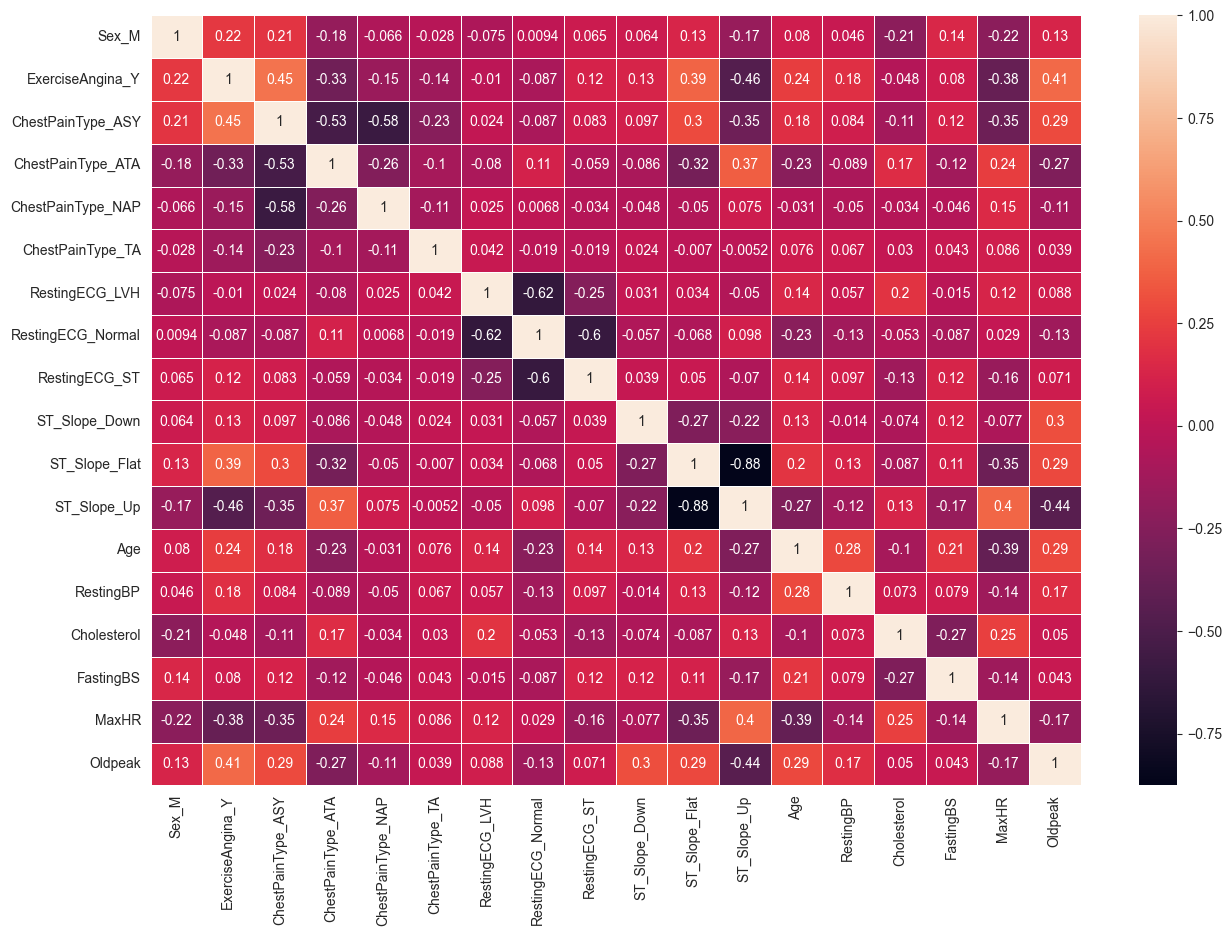

In [43]:
plt.figure(figsize=(15, 10))
sns.heatmap(pipeline_heart[:-1].fit_transform(X=X_heart_train, y=y_heart_train).corr(), annot=True, linewidths=0.5, cbar=True)
plt.show()

In [44]:
y_heart_hat = pipeline_heart.predict(X=X_heart_test)

In [45]:
X_heart_train_transformed = pipeline_heart[:-1].transform(X=X_heart_train)
X_heart_train_transformed

Sex_M  ExerciseAngina_Y  ChestPainType_ASY  ChestPainType_ATA  \
795    1.0               0.0                0.0                0.0   
25     1.0               0.0                0.0                0.0   
84     1.0               1.0                1.0                0.0   
10     0.0               0.0                0.0                0.0   
344    1.0               0.0                1.0                0.0   
..     ...               ...                ...                ...   
106    0.0               0.0                1.0                0.0   
270    1.0               0.0                1.0                0.0   
860    1.0               1.0                1.0                0.0   
435    1.0               1.0                1.0                0.0   
102    0.0               0.0                1.0                0.0   

     ChestPainType_NAP  ChestPainType_TA  RestingECG_LVH  RestingECG_Normal  \
795                1.0               0.0             0.0                1.0   
25                 1.0               0.0             0.0                1.0   
84                 0.0               0.0             0.0                1.0   
10                 1.0               0.0             0.0                1.0   
344                0.0               0.0             0.0                1.0   
..                 ...               ...             ...                ...   
106                0.0               0.0             0.0                0.0   
270                0.0               0.0             0.0                1.0   
860                0.0               0.0             0.0                1.0   
435                0.0               0.0             0.0                0.0   
102                0.0               0.0             0.0                1.0   

     RestingECG_ST  ST_Slope_Down  ST_Slope_Flat  ST_Slope_Up  Age  RestingBP  \
795            0.0            1.0            0.0          0.0   42        120   
25             0.0            0.0            0.0          1.0   36        130   
84             0.0            0.0            1.0          0.0   56        150   
10             0.0            0.0            0.0          1.0   37        130   
344            0.0            0.0            1.0          0.0   51        120   
..             ...            ...            ...          ...  ...        ...   
106            1.0            0.0            0.0          1.0   48        120   
270            0.0            0.0            0.0          1.0   45        120   
860            0.0            0.0            0.0          1.0   60        130   
435            1.0            0.0            0.0          1.0   60        152   
102            0.0            0.0            1.0          0.0   40        150   

     Cholesterol  FastingBS  MaxHR  Oldpeak  
795          240          1    194      0.8  
25           209          0    178      0.0  
84           213          1    125      1.0  
10           211          0    142      0.0  
344            0          1    104      0.0  
..           ...        ...    ...      ...  
106          254          0    110      0.0  
270          225          0    140      0.0  
860          253          0    144      1.4  
435            0          0    118      0.0  
102          392          0    130      2.0  

[734 rows x 18 columns]

In [46]:
viz = model(model=pipeline_heart[-1],
            X_train=X_heart_train_transformed,
            y_train=y_heart_train,
            feature_names=X_heart_train_transformed.columns.tolist(),
            target_name=y_heart_target.name)

In [47]:
viz_obj = viz.view()
viz_obj.show()

D:\Programming\Projects\Sigmoid\.venv_hw_17\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed x limits to fulfill fixed data aspect with a

In [48]:
x_viz = pipeline_heart[:-1].transform(X=X_heart_train).iloc[10]

In [49]:
viz_obj = viz.view(x=x_viz)
viz_obj.show()

D:\Programming\Projects\Sigmoid\.venv_hw_17\Lib\site-packages\dtreeviz\models\shadow_decision_tree.py:335: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
D:\Programming\Projects\Sigmoid\.venv_hw_17\Lib\site-packages\dtreeviz\trees.py:1231: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed 

D:\Programming\Projects\Sigmoid\.venv_hw_17\Lib\site-packages\dtreeviz\models\shadow_decision_tree.py:335: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`


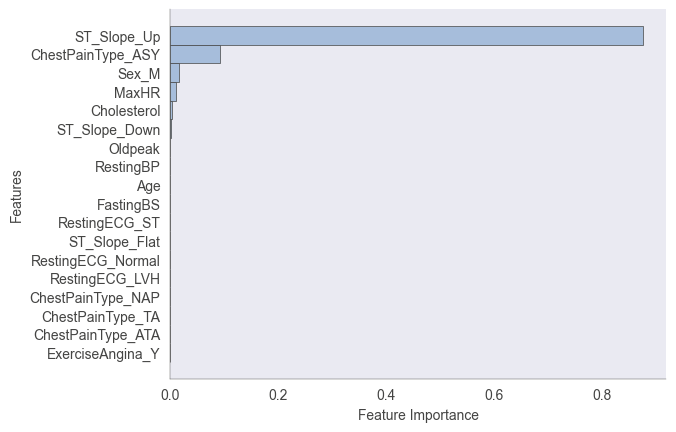

In [50]:
viz.instance_feature_importance(x=x_viz)

<Axes: >

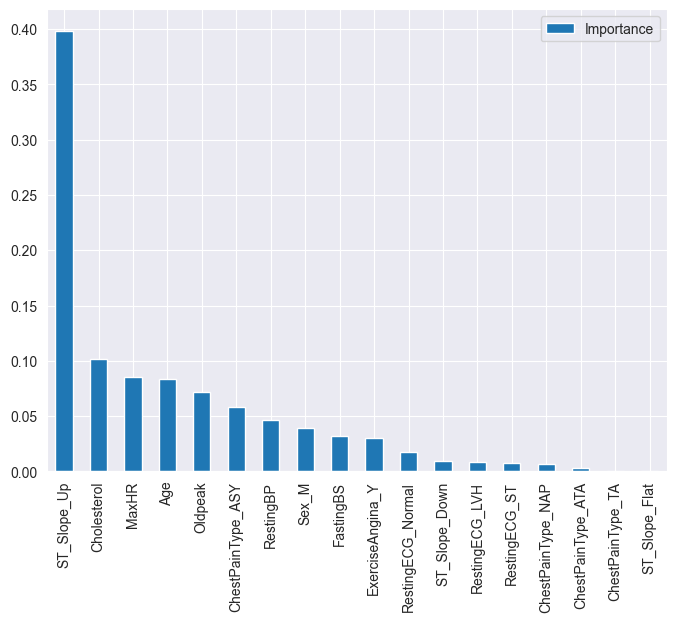

In [51]:
feat_importances = pd.DataFrame(pipeline_heart[-1].feature_importances_, index=X_heart_train_transformed.columns, columns=["Importance"])
feat_importances.sort_values(by='Importance', ascending=False, inplace=True)
feat_importances.plot(kind='bar', figsize=(8,6))

As it may be seen, in case of predicting Heart Disease in patients (`HeartDisease` column), the most important features are:
1. `ST_Slope_Up` (slope of the peak exercise ST segment - Upsloping),
2. `Age`,
3. `Cholesterol`.

# MAE, MSE and RMSE - Electric Motor Temperature Dataset

### Mean Absolute Error
Represents the average of the absolute difference between the actual and predicted values in the dataset. It measures the average of the residuals in the dataset.  It can be
interpreted as the mean deviation of the model from the true values. In other words, it treats all errors equally.
$$
\begin{gather*}
MAE = \frac{1}{N}\sum_{i=1}^N\left| \hat{y_i} - y_i \right| = \frac{1}{N}\sum_{i=1}^N\left| \epsilon_i \right| \\
\hat{y_i} \text{ - predicted $i^{th}$ example target value} \\
y_i \text{ - true $i^{th}$ example target value} \\
N \text{ - number of examples}
\end{gather*}
$$

### Mean Squared Error
Represents the average of the squared difference between the original and predicted values in the data set. It measures the variance of the residuals. It can be interpreted as the mean
Euclidean (or second norm) between the correct answers and the predicted ones. In other words, it penalizes larger errors more significantly due to the squaring operation.
$$
\begin{gather*}
MSE = \frac{1}{N}\sum_{i=1}^N\left( \hat{y_i} - y_i \right)^2 = \frac{1}{N}\sum_{i=1}^N \epsilon_i^2 \\
\hat{y_i} \text{ - predicted $i^{th}$ example target value} \\
y_i \text{ - true $i^{th}$ example target value} \\
N \text{ - number of examples}
\end{gather*}
$$

### Root Mean Squared Error
Represents the square root of Mean Squared error. It measures the standard deviation of residuals. In other words, it is similar to MSE, but with the same units as the target variable,
making it more interpretable.
$$
\begin{gather*}
RMSE = \sqrt{MSE} = \sqrt{ \frac{1}{N} \sum_{i=1}^N \left( \hat{y}_i - y_i \right)^2 } = \sqrt{\frac{1}{N}\sum_{i=1}^N \epsilon_i^2} \\
\hat{y_i} \text{ - predicted $i^{th}$ example target value} \\
y_i \text{ - true $i^{th}$ example target value} \\
N \text{ - number of examples}
\end{gather*}
$$

In [52]:
regression_results_table: pd.DataFrame = pd.DataFrame(columns=['Estimator', 'MSE', 'MAE', 'RMSE'])

In [53]:
estimators: dict[str, BaseEstimator] = {
    'Linear Regressor': LinearRegression(),
    'K-Nearest Neighbors Regressor': KNeighborsRegressor(),
    'Random Forest Regressor': RandomForestRegressor(verbose=1),
    'Decision Tree Regressor': DecisionTreeRegressor()
}

In [54]:
best_regressor_estimator = None

In [55]:
for estimator_name, estimator_object in tqdm(estimators.items(), desc="Fitting regression models"):
    pipeline_motor: Pipeline = create_pipeline(transformers=[('drop_transform', drop_transformer)], scaler=None, model=estimator_object)

    start_time = time.time()
    pipeline_motor.fit(X=X_motor_train, y=y_motor_train)
    end_time = time.time()
    total_time = (end_time - start_time) * 1000

    y_motor_hat = pipeline_motor.predict(X=X_motor_test)
    mse = mean_squared_error(y_true=y_motor_test, y_pred=y_motor_hat)
    mae = mean_absolute_error(y_true=y_motor_test, y_pred=y_motor_hat)
    rmse = root_mean_squared_error(y_true=y_motor_test, y_pred=y_motor_hat)
    tqdm.write(f"Estimator: {estimator_name}"
               f"\nTime Taken: {total_time:.4f} ms"
               f"\nMSE: {mse}"
               f"\nMAE: {mae}"
               f"\nRMSE: {rmse}"
               f"\n")
    regression_results_table = pd.concat([regression_results_table,
                                          pd.DataFrame(columns=['Estimator', 'MSE', 'MAE', 'RMSE'],
                                                       data=[[estimator_name, mse, mae, rmse]])],
                                         axis=0,
                                         ignore_index=True
    )
    if best_regressor_estimator is None or mse < best_regressor_estimator['MSE']:
        best_regressor_estimator = {
            'Estimator': estimator_name,
            'MSE': mse,
            'MAE': mae,
            'RMSE': rmse,
            'Pipeline': pipeline_motor
        }


Fitting regression models:   0%|          | 0/4 [00:00<?, ?it/s]

Estimator: Linear Regressor
Time Taken: 38.1913 ms
MSE: 52.949646603828924
MAE: 5.472577749349477
RMSE: 7.2766507820445065



C:\Users\user\AppData\Local\Temp\ipykernel_7620\3521487457.py:19: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
Fitting regression models:  50%|█████     | 2/4 [00:00<00:00,  2.33it/s]

Estimator: K-Nearest Neighbors Regressor
Time Taken: 325.3901 ms
MSE: 27.032238311840505
MAE: 2.5447365911395137
RMSE: 5.199253630266608



[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:  1.0min
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.4s
Fitting regression models:  75%|███████▌  | 3/4 [02:09<00:53, 53.80s/it]

Estimator: Random Forest Regressor
Time Taken: 127440.5375 ms
MSE: 2.989121581076867
MAE: 0.7569681032104667
RMSE: 1.7289076265309453



Fitting regression models: 100%|██████████| 4/4 [02:11<00:00, 32.88s/it]

Estimator: Decision Tree Regressor
Time Taken: 2108.5386 ms
MSE: 6.9389261659601775
MAE: 0.7676672193589987
RMSE: 2.6341841556656926



In [56]:
regression_results_table

Estimator        MSE       MAE      RMSE
0               Linear Regressor  52.949647  5.472578  7.276651
1  K-Nearest Neighbors Regressor  27.032238  2.544737  5.199254
2        Random Forest Regressor   2.989122  0.756968  1.728908
3        Decision Tree Regressor   6.938926  0.767667  2.634184

In [57]:
best_regressor_estimator

{'Estimator': 'Random Forest Regressor',
 'MSE': 2.989121581076867,
 'MAE': 0.7569681032104667,
 'RMSE': 1.7289076265309453,
 'Pipeline': Pipeline(steps=[('drop_transform',
                  ColumnTransformer(force_int_remainder_cols=False,
                                    remainder='passthrough',
                                    transformers=[('drop', 'drop',
                                                   ['profile_id'])],
                                    verbose_feature_names_out=False)),
                 ('model', RandomForestRegressor(verbose=1))])}

The best model is Random Forest Regressor, with the lowest Mean Squared Error, which means that this model makes rarely large errors, Mean Absolute Error, which means that overall model has a good average error magnitude and Root Mean Squared Error, which is expressed in target units.

# Accuracy, Precision, Recall and F1-Score - Heart Disease Prediction Dataset

### Precision
Precision - the ratio of the correctly predicted class to the total predicted class.
$$
\begin{gather*}
Precision = \frac{TP}{TP + FP} \\
TP \text{ - True Positives} \\
FP \text{ - False Positives}
\end{gather*}
$$

### Recall
Recall - the ratio of correctly predicted class to all data in the actual class.
$$
\begin{gather*}
Recall = \frac{TP}{TP + FN} \\
TP \text{ - True Positives} \\
FN \text{ - False Negatives}
\end{gather*}
$$

### Accuracy
Accuracy - the overall accuracy score for the classifier gives a general idea of the model's performance but can be misleading as it considers every correct
prediction for all classes.
$$
\begin{gather*}
Accuracy = \frac{TP + TN}{TP + TN + FP + FN} \\
TP \text{ - True Positives} \\
TN \text{ - True Negatives} \\
FP \text{ - False Positives} \\
FN \text{ - False Negatives}
\end{gather*}
$$

### F1-Score
F1 Score - a harmonic means between the Precision and Recall score.
$$
\begin{gather*}
F1 = 2 \times \frac{Precision \times Recall}{Precision + Recall}
\end{gather*}
$$

In [58]:
classification_results_table: pd.DataFrame = pd.DataFrame(columns=['Estimator', 'Accuracy', 'Precision', 'Recall', 'F1-Score'])

In [59]:
estimators: dict[str, BaseEstimator] = {
    'Logistic Regressor': LogisticRegression(),
    'Gaussian Naive Bayes': GaussianNB(),
    'K-Nearest Neighbors Classifier': KNeighborsClassifier(),
    'Random Forest Classifier': RandomForestClassifier(),
    'Decision Tree Classifier': DecisionTreeClassifier(),
    'Bernoulli Naive Bayes': BernoulliNB(),
    # 'Multinomial Naive Bayes': MultinomialNB()
}

In [60]:
best_classifier_estimator = None
classification_report_obj = None
confusion_matrix_obj = None

In [61]:
for estimator_name, estimator_object in tqdm(estimators.items(), desc="Fitting classification models"):
    pipeline_heart: Pipeline = create_pipeline(transformers=[('encode', encoder_transformer)], model=estimator_object)

    start_time = time.time()
    pipeline_heart.fit(X=X_heart_train, y=y_heart_train)
    end_time = time.time()
    total_time = (end_time - start_time) * 1000

    y_heart_hat = pipeline_heart.predict(X=X_heart_test)
    accuracy_val = accuracy_score(y_true=y_heart_test, y_pred=y_heart_hat)
    precision_val = precision_score(y_true=y_heart_test, y_pred=y_heart_hat)
    recall_val = recall_score(y_true=y_heart_test, y_pred=y_heart_hat)
    f1_score_val = f1_score(y_true=y_heart_test, y_pred=y_heart_hat)
    tqdm.write(f"Estimator: {estimator_name}"
               f"\nTime Taken: {total_time:.4f} ms"
               f"\nAccuracy: {accuracy_val}"
               f"\nPrecision: {precision_val}"
               f"\nRecall: {recall_val}"
               f"\nF1-Score: {f1_score_val}"
               f"\n")
    classification_results_table = pd.concat([classification_results_table,
                                          pd.DataFrame(columns=['Estimator', 'Accuracy', 'Precision', 'Recall', 'F1-Score'],
                                                       data=[[estimator_name, accuracy_val, precision_val, recall_val, f1_score_val]])],
                                         axis=0,
                                         ignore_index=True
    )
    if best_classifier_estimator is None or f1_score_val > best_classifier_estimator['F1-Score']:
        best_classifier_estimator = {
            'Estimator': estimator_name,
            'Accuracy': accuracy_val,
            'Precision': precision_val,
            'Recall': recall_val,
            'F1-Score': f1_score_val,
            'Pipeline': pipeline_heart
        }
        classification_report_obj = classification_report(y_true=y_heart_test, y_pred=y_heart_hat)
        confusion_matrix_obj = confusion_matrix(y_true=y_heart_test, y_pred=y_heart_hat)


Fitting classification models:   0%|          | 0/6 [00:00<?, ?it/s]D:\Programming\Projects\Sigmoid\.venv_hw_17\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
Fitting classification models:  33%|███▎      | 2/6 [00:00<00:00, 17.54it/s]

Estimator: Logistic Regressor
Time Taken: 54.0237 ms
Accuracy: 0.8641304347826086
Precision: 0.9019607843137255
Recall: 0.8598130841121495
F1-Score: 0.8803827751196173

Estimator: Gaussian Naive Bayes
Time Taken: 10.9992 ms
Accuracy: 0.8586956521739131
Precision: 0.9090909090909091
Recall: 0.8411214953271028
F1-Score: 0.8737864077669902



Fitting classification models:  33%|███▎      | 2/6 [00:00<00:00, 17.54it/s]

Estimator: K-Nearest Neighbors Classifier
Time Taken: 13.9999 ms
Accuracy: 0.7065217391304348
Precision: 0.7731958762886598
Recall: 0.7009345794392523
F1-Score: 0.7352941176470589



Fitting classification models: 100%|██████████| 6/6 [00:00<00:00,  7.85it/s]

Estimator: Random Forest Classifier
Time Taken: 183.0013 ms
Accuracy: 0.8804347826086957
Precision: 0.912621359223301
Recall: 0.8785046728971962
F1-Score: 0.8952380952380953

Estimator: Decision Tree Classifier
Time Taken: 13.9973 ms
Accuracy: 0.7989130434782609
Precision: 0.8723404255319149
Recall: 0.7663551401869159
F1-Score: 0.8159203980099502

Estimator: Bernoulli Naive Bayes
Time Taken: 11.9996 ms
Accuracy: 0.8695652173913043
Precision: 0.9108910891089109
Recall: 0.8598130841121495
F1-Score: 0.8846153846153846



In [62]:
classification_results_table

Estimator  Accuracy  Precision    Recall  F1-Score
0              Logistic Regressor  0.864130   0.901961  0.859813  0.880383
1            Gaussian Naive Bayes  0.858696   0.909091  0.841121  0.873786
2  K-Nearest Neighbors Classifier  0.706522   0.773196  0.700935  0.735294
3        Random Forest Classifier  0.880435   0.912621  0.878505  0.895238
4        Decision Tree Classifier  0.798913   0.872340  0.766355  0.815920
5           Bernoulli Naive Bayes  0.869565   0.910891  0.859813  0.884615

In [63]:
best_classifier_estimator

{'Estimator': 'Random Forest Classifier',
 'Accuracy': 0.8804347826086957,
 'Precision': 0.912621359223301,
 'Recall': 0.8785046728971962,
 'F1-Score': 0.8952380952380953,
 'Pipeline': Pipeline(steps=[('encode',
                  ColumnTransformer(force_int_remainder_cols=False,
                                    remainder='passthrough',
                                    transformers=[('encode_binary',
                                                   OneHotEncoder(drop='first',
                                                                 sparse_output=False),
                                                   ['Sex', 'ExerciseAngina']),
                                                  ('encode_multiclass',
                                                   OneHotEncoder(sparse_output=False),
                                                   ['ChestPainType',
                                                    'RestingECG', 'ST_Slope'])],
                                    v

In [64]:
print(classification_report_obj)

              precision    recall  f1-score   support

           0       0.84      0.88      0.86        77
           1       0.91      0.88      0.90       107

    accuracy                           0.88       184
   macro avg       0.88      0.88      0.88       184
weighted avg       0.88      0.88      0.88       184



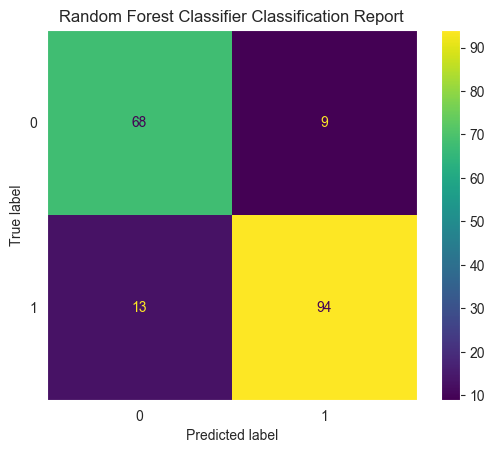

In [65]:
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_obj)
disp.plot()
plt.title(f'{best_classifier_estimator['Estimator']} Classification Report')
plt.grid(False)
plt.show()

As observed, the Random Forest was again the best-performing estimator, achieving the highest F1-score.
1. The F1-score represents the harmonic mean of precision and recall, providing a balanced measure between the two metrics. This is especially important when both false positives and false negatives carry significant weight.
2. In medical applications, recall is often prioritized because it reflects the proportion of true positives correctly identified among all actual positive cases.
3. High recall minimizes false negatives, which is critical to avoid missing patients who truly have the condition.
4. While this may increase false positives, it is typically an acceptable trade-off in medical diagnostics to ensure potentially ill patients are not overlooked.

# LIME Interpretation of Random Forest Regressor - Electric Motor Temperature Dataset

In [66]:
# random_forest_regressor = RandomForestRegressor()

In [67]:
# pipeline_motor = create_pipeline(transformers=[('drop', drop_transformer)], model=random_forest_regressor)
pipeline_motor = best_regressor_estimator['Pipeline']

In [68]:
X_motor_train_transformed = pipeline_motor[:-1].transform(X=X_motor_train)

In [69]:
X_motor_test_transformed = pipeline_motor[:-1].transform(X=X_motor_test)

In [70]:
explainer = LimeTabularExplainer(
    training_data=X_motor_train_transformed.values,
    feature_names=X_motor_train_transformed.columns.tolist(),
    class_names=[y_motor_target.name],
    verbose=True,
    mode='regression'
)

In [71]:
explanation = explainer.explain_instance(X_motor_test_transformed.iloc[2], pipeline_motor[-1].predict)

Intercept 58.469097094056686
Prediction_local [64.19457123]
Right: 87.85339267730713


D:\Programming\Projects\Sigmoid\.venv_hw_17\Lib\site-packages\lime\discretize.py:110: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
D:\Programming\Projects\Sigmoid\.venv_hw_17\Lib\site-packages\lime\discretize.py:110: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
D:\Programming\Projects\Sigmoid\.venv_hw_17\Lib\site-packages\lime\lime_tabular.py:544: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
D:\Programming\Projects\Sigmoid\.venv_h

In [72]:
print(f"True Label: {y_motor_test.iloc[2]}")

True Label: 87.67278289794922


In [73]:
print(f"Predicted Label: {pipeline_motor[-1].predict(X=X_motor_test_transformed.iloc[[2]])[0]}")

Predicted Label: 87.85339267730713


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


In [74]:
explanation.show_in_notebook(show_table=True, show_all=False)

As it may be seen, for $i=2$, we got the following interpretation:
1. The Motor Temperature, value that was predicted, is High, close to the Max Value in the dataset.
2. Stator Tooth Temperature has the highest positive impact on the temperature of the motor, since it is one of the main parts of the motor, that is directly affected by temperature increase.
3. Coolant Temperature has second highest positive impact on the `pm` column, which is probably due to the poor quality of the coolant (Low Coolant Temperature results in Higher Motor Temperature, therefore may be a inverse proportional relationship).
4. High Torque has highest negative impact on the `pm` target, which is surprising, since logically - higher torque, higher temperature of the motor. However, in practice, High Temperature may result in decrease of the Torque
5. Ambient Temperature is relatively low compared to the Stator, so it reduces the temperature of the motor.

In [75]:
print(f"True Label: {y_motor_test.iloc[20]}")

True Label: 31.532997131347656


In [76]:
print(f"Predicted Label: {pipeline_motor[-1].predict(X=X_motor_test_transformed.iloc[[20]])[0]}")

Predicted Label: 31.38432228088379


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


In [77]:
explanation = explainer.explain_instance(X_motor_test_transformed.iloc[20], pipeline_motor[-1].predict)

D:\Programming\Projects\Sigmoid\.venv_hw_17\Lib\site-packages\lime\discretize.py:110: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
D:\Programming\Projects\Sigmoid\.venv_hw_17\Lib\site-packages\lime\discretize.py:110: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
D:\Programming\Projects\Sigmoid\.venv_hw_17\Lib\site-packages\lime\lime_tabular.py:544: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
D:\Programming\Projects\Sigmoid\.venv_h

Intercept 65.90832113379382
Prediction_local [43.05664491]
Right: 31.38432228088379


D:\Programming\Projects\Sigmoid\.venv_hw_17\Lib\site-packages\lime\discretize.py:110: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
D:\Programming\Projects\Sigmoid\.venv_hw_17\Lib\site-packages\lime\lime_tabular.py:427: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`


In [78]:
explanation.show_in_notebook(show_table=True, show_all=False)

As it may be seen, for $i=20$, we got the following interpretation:
1. The Motor Temperature, value that was predicted, is Low, close to the Min Value in the dataset.
2. Stator Tooth Temperature has the highest negative impact on the temperature of the motor, since it is one of the main parts of the motor, that is directly affected by temperature increase.
3. Ambient Temperature is relatively low compared to the predicted temperature and stator components, thus making the temperature go down.
4. Coolant Temperature has the highest positive impact on the `pm` column, although it is under 18.7 degrees, it still impacts the motor temperature, probably the temperature is not risen yet due to the low overall temperature of the motor.
5. Relatively Low Speed (1065) compared to maximum in this column of $\approx 6000$ has also a very small positive impact on the `pm` target, which results in low torque and low overall output action of the motor, thus meaning that motor works under no stress at all and at relatively low speed, therefore the temperature is impacted slightly, but not significantly.


In [79]:
print(f"True Label: {y_motor_test.iloc[50]}")

True Label: 40.89625060637498


In [80]:
print(f"Predicted Label: {pipeline_motor[-1].predict(X=X_motor_test_transformed.iloc[[50]])[0]}")

Predicted Label: 41.711819361628635


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


In [81]:
explanation = explainer.explain_instance(X_motor_test_transformed.iloc[50], pipeline_motor[-1].predict)

D:\Programming\Projects\Sigmoid\.venv_hw_17\Lib\site-packages\lime\discretize.py:110: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
D:\Programming\Projects\Sigmoid\.venv_hw_17\Lib\site-packages\lime\discretize.py:110: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
D:\Programming\Projects\Sigmoid\.venv_hw_17\Lib\site-packages\lime\lime_tabular.py:544: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
D:\Programming\Projects\Sigmoid\.venv_h

Intercept

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
D:\Programming\Projects\Sigmoid\.venv_hw_17\Lib\site-packages\lime\discretize.py:110: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
D:\Programming\Projects\Sigmoid\.venv_hw_17\Lib\site-packages\lime\discretize.py:110: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
D:\Programming\Projects\Sigmoid\.venv_hw_17\Lib\site-packages\lime\lime_tabular.py:427: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position

 64.36710846649666
Prediction_local [47.59027227]
Right: 41.711819361628635


In [82]:
explanation.show_in_notebook(show_table=True, show_all=False)

As it may be seen, for $i=50$, we got the following interpretation:
1. The Motor Temperature, value that was predicted, is Relatively Low, close to the Min Value in the dataset.
2. Stator Tooth Temperature has the highest negative impact on the temperature of the motor, since it is one of the main parts of the motor, that is directly affected by temperature increase.
3. Coolant Temperature has the highest negative impact on the `pm` column, it is $\approx 24$ degrees, it impacts the motor temperature, meaning that a part of the temperature of the motor is taken away by the coolant, which results in its increase and decrease of the motor temperature.
4. Ambient Temperature is relatively low compared to the predicted temperature and stator components, thus making the temperature go down.
5. Relatively High Speed (4435) compared to maximum in this column of $\approx 6000$ has also a small positive impact on the `pm` target, which results in high overall output action of the motor, thus meaning that motor works under stress and at relatively high speed, therefore the temperature is impacted slightly in the increasing direction.

# SHAP Interpretation of Random Forest Classifier - Heart Disease Prediction Dataset

In [83]:
shap.initjs()

In [84]:
# random_forest_classifier = RandomForestClassifier()

In [85]:
# pipeline_heart = create_pipeline(transformers=[('drop', drop_transformer)], model=random_forest_classifier)
pipeline_heart = best_classifier_estimator['Pipeline']

In [86]:
X_heart_train_transformed = pipeline_heart[:-1].transform(X=X_heart_train)

In [87]:
X_heart_test_transformed = pipeline_heart[:-1].transform(X=X_heart_test)

In [88]:
explainer = shap.Explainer(pipeline_heart[-1].predict, X_heart_train_transformed, feature_names=X_heart_train_transformed.columns.tolist())

In [89]:
shap_values = explainer(X_heart_test_transformed)

PermutationExplainer explainer: 185it [00:57,  3.21it/s]                         


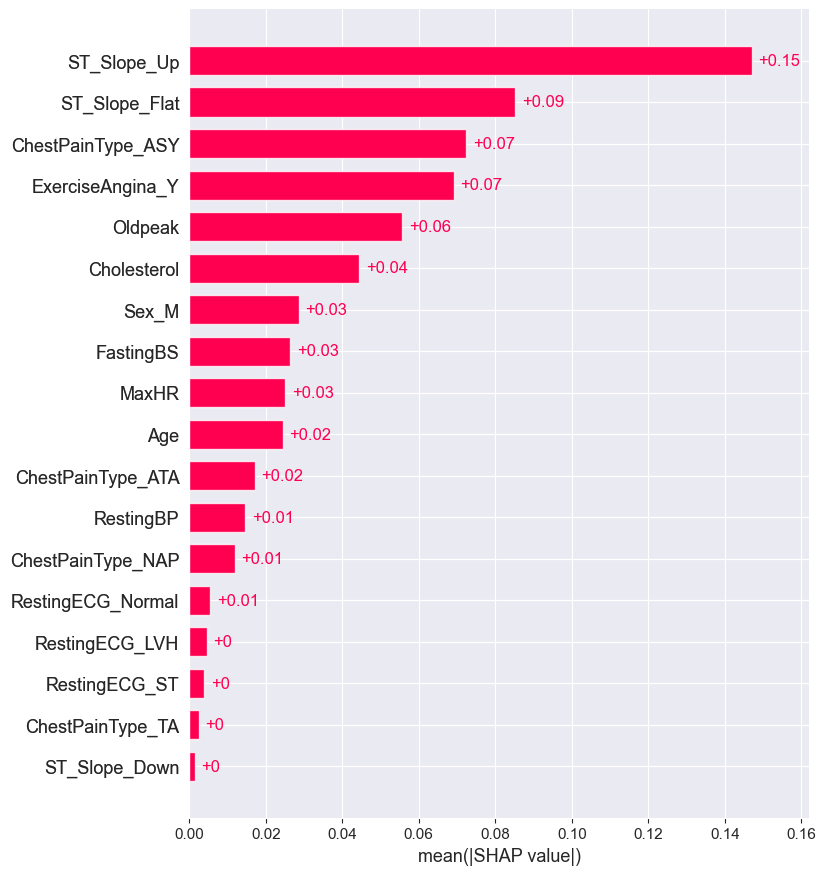

In [90]:
shap.plots.bar(shap_values, max_display=len(X_heart_train_transformed.columns.tolist()))

As it may be seen, the highest absolute impact on the SHAP value has the column - `ST_Slope_Up` which is the Slope of the Peak Exercise ST Segment is Upsloping, as well as `ST_Slope_Flat` - Slope of the Peak Exercise ST Segment is Flat, as well as `ExerciseAngina_Y`, which means that patient manifests exercise-induced angina.

In [91]:
print(f"True Label: {y_heart_test.iloc[0]}")

True Label: 0


In [92]:
print(f"Predicted Label: {pipeline_heart[-1].predict(X=X_heart_test_transformed.iloc[[0]])[0]}")

Predicted Label: 0


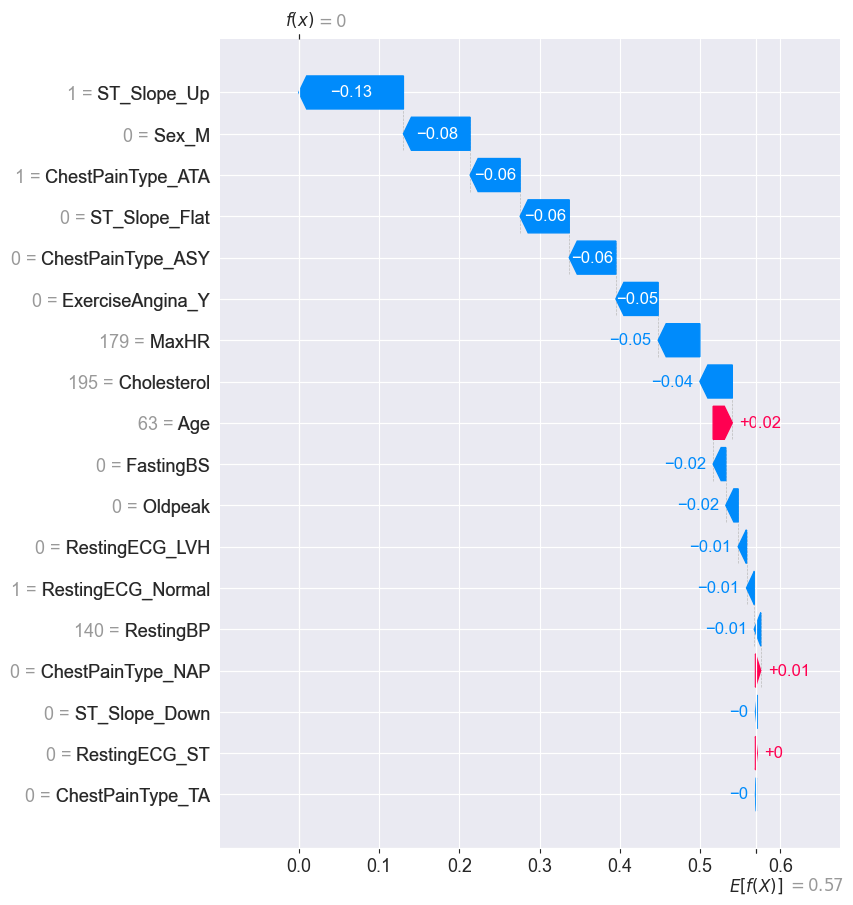

In [93]:
shap.plots.waterfall(shap_values[0], max_display=len(X_heart_train_transformed.columns.tolist()))

In the case of Waterfall SHAP plots, it is individual for each data sample. $E[f(X)]$ is the baseline prediction, expected average output of predictions. Each feature, in this case (sample $i=0$), influences the prediction and moves the prediction to one of the extremities. In this case, highest impact on the prediction have previously mentioned columns, such as: `ST_Slope_Up` and `ST_Slope_Flat`, as well as - `ChestPainType_ASY`. Specifically, this patient that has 63 years and relatively High Resting Blood Pressure, is inclined to have the heart disease, but since other influential features, such as missing exercised induced angina, low Old Peak (ST depression caused by exercise or stress, compared to resting levels) common with their age, Male gender and normal ST Segment behavior (Upsloping) during exercises, made the model decide correctly that this person has no Heart Disease.

In [94]:
print(f"True Label: {y_heart_test.iloc[5]}")

True Label: 1


In [95]:
print(f"Predicted Label: {pipeline_heart[-1].predict(X=X_heart_test_transformed.iloc[[5]])[0]}")

Predicted Label: 1


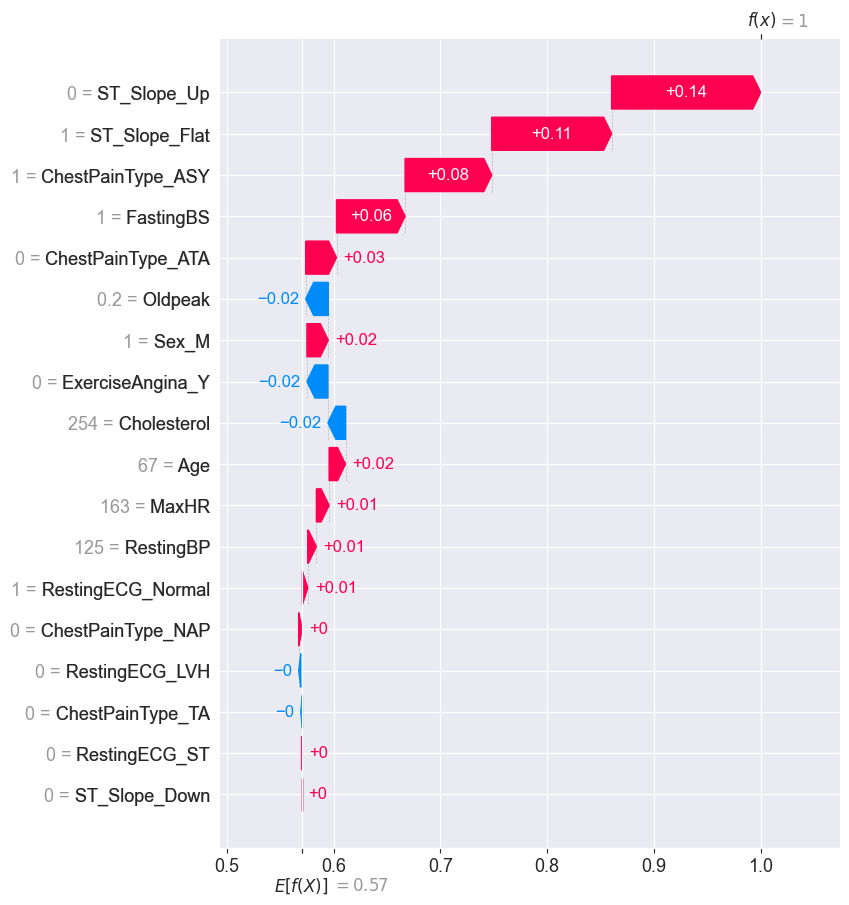

In [96]:
shap.plots.waterfall(shap_values[5], max_display=len(X_heart_train_transformed.columns.tolist()))

In the case of sample $i=5$, influences the prediction and moves the prediction to one of the extremities. In this case, highest impact on the prediction have previously mentioned columns, such as: `ST_Slope_Up` and `ST_Slope_Flat`, as well as - `ChestPainType_ASY`. Specifically, this patient that has 67 years and relatively High Resting Blood Pressure, is inclined to have the heart disease, and since other influential features, such as Male gender and abnormal ST Segment behavior (Flat) during exercises (normally, should be Upsloping), as well as Asymptomatic Chest Pain, which can be a dangerous sign of Silent Heart Disease, High Fasting Blood Sugar, leading to probable Diabetes problems, made the model decide correctly that this person has a Heart Disease.

In [97]:
print(f"True Label: {y_heart_test.iloc[10]}")

True Label: 0


In [98]:
print(f"Predicted Label: {pipeline_heart[-1].predict(X=X_heart_test_transformed.iloc[[10]])[0]}")

Predicted Label: 1


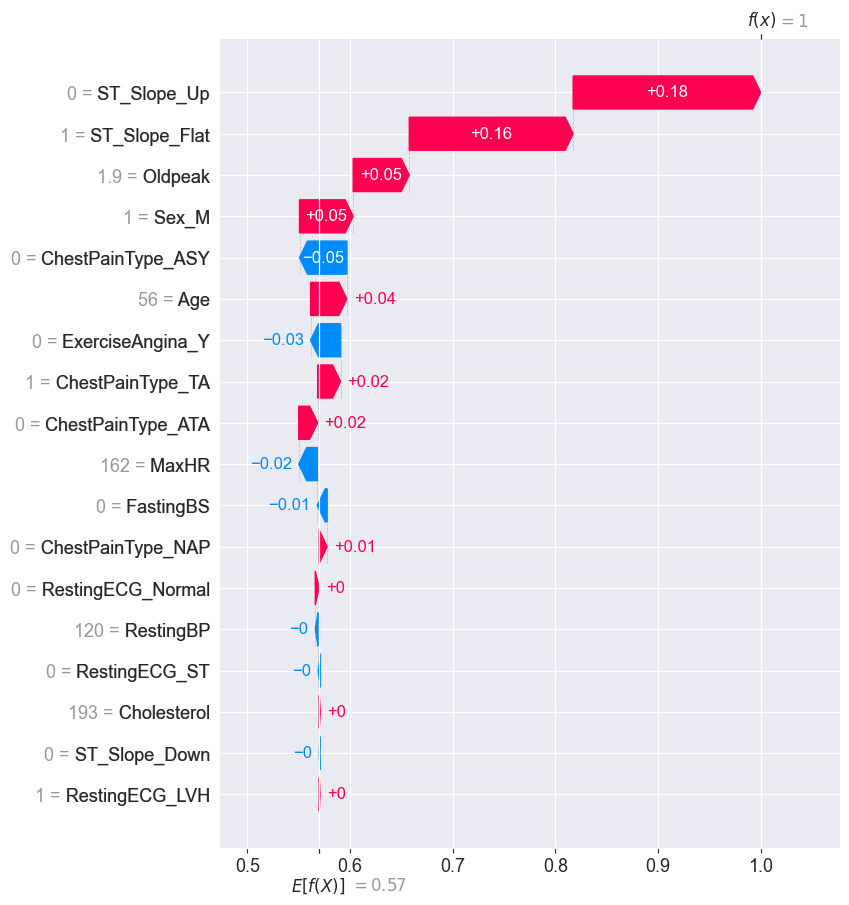

In [99]:
shap.plots.waterfall(shap_values[10], max_display=len(X_heart_train_transformed.columns.tolist()))

In the case of sample $i=10$, case when model misclassified missing Heart Disease with a present one, which is a False Positive, tolerated by model, since it is better to ancounter False Positives rather than False Negatives. In this case, highest impact on the prediction have previously mentioned columns, such as: `ST_Slope_Flat` and `ST_Slope_Up`, as well as - `ChestPainType_ASY`. Specifically, this patient that has 56 years and relatively Typical Angina Chest Pain, is inclined to have the heart disease, and since other influential features, such as  and abnormal ST Segment behavior (Flat) during exercises (normally, should be Upsloping), as well as missing Asymptomatic Chest Pain, which saves from being a dangerous sign of Silent Heart Disease, Normal Low Fasting Blood Sugar, relatively risky Old Peak, made the model a little bit confused about this person and classified them as having a Heart Disease.

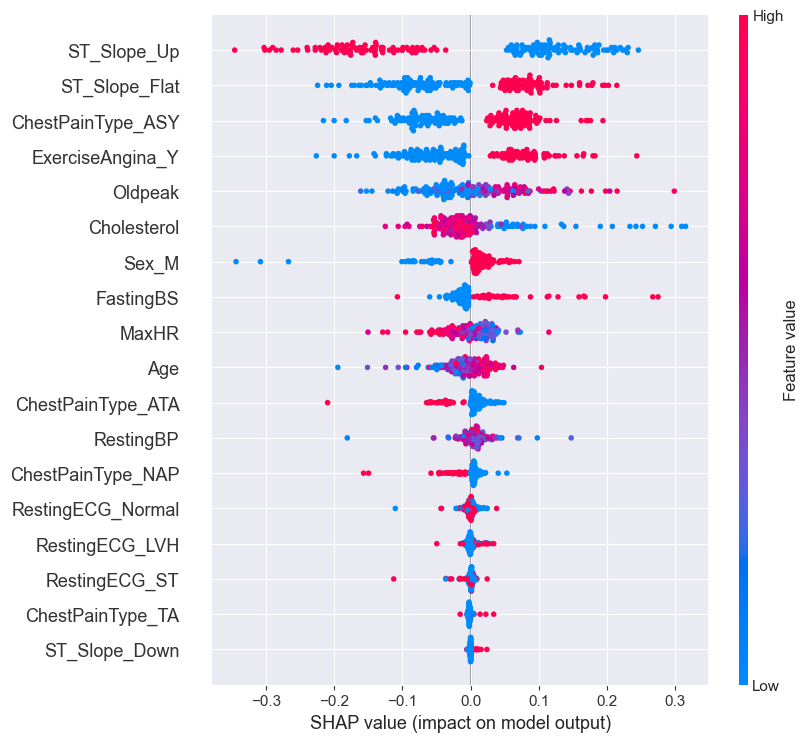

In [100]:
shap.plots.beeswarm(shap_values, max_display=len(X_heart_train_transformed.columns.tolist()))

Beeswarm SHAP Plots offer information about the global trends of the dataset and model interpretation. In this case, it is ordered by SHAP Value impact on the model output of each feature. Again. previously mentioned columns are in the top here.
1. Presence of Normal ST Segment Behavior - Upsloping, during exercises, lead to lower SHAP Values, thus makes the prediction incline to $0$ - no heart disease
2. Presence of Abnormal ST Segment Behavior - Flat, during exercises, lead to higher SHAP Values, thus makes the prediction incline to $1$ - heart disease
3. Presence of Asymptomatic Chest Pain - which can be a dnagerous sign of hidden, silent heart disease, makes the prediction incline to $1$ - heart disease
4. Presence of Exercise Induced Angina - most common form of angina, caused by reduced blood flow to the heart, makes the prediction incline to $1$ - heart disease
5. High Values of Old Peak - ST Segment Depression induced by exercise relative to rest, incline the prediction to $1$ - heart disease, since they lead to higher SHAP Values.
6. Very low levels of cholesterol also have higher SHAP Values and incline the prediction to positive target label (Presence of Heart Disease).
7. Low Fasting Blood Sugar leads to lower values of SHAP Values and incline the prediction to negative target label (Absence of Heart Disease).
8. Inconclusive - several columns/features are inconclusive, and present no significant impact on the SHAP Values no matter of the feature values themselves.

In [101]:
print(f"True Label: {y_heart_test.iloc[0]}")

True Label: 0


In [102]:
print(f"Predicted Label: {pipeline_heart[-1].predict(X=X_heart_test_transformed.iloc[[0]])[0]}")

Predicted Label: 0


In [103]:
shap.force_plot(shap_values[0], X_heart_test_transformed.iloc[0])

In [104]:
print(f"True Label: {y_heart_test.iloc[5]}")

True Label: 1


In [105]:
print(f"Predicted Label: {pipeline_heart[-1].predict(X=X_heart_test_transformed.iloc[[5]])[0]}")

Predicted Label: 1


In [106]:
shap.force_plot(shap_values[5], X_heart_test_transformed.iloc[5])

In [107]:
print(f"True Label: {y_heart_test.iloc[10]}")

True Label: 0


In [108]:
print(f"Predicted Label: {pipeline_heart[-1].predict(X=X_heart_test_transformed.iloc[[10]])[0]}")

Predicted Label: 1


In [109]:
shap.force_plot(shap_values[10], X_heart_test_transformed.iloc[10])